# Network X basics

These exercises are partly taken from the networkX tutorial ([here](https://networkx.org/documentation/stable/tutorial.html#analyzing-graphs)). The References are [here](https://networkx.org/documentation/stable/reference/index.html).

In [9]:
import networkx as nx

## Create an empty graph with no nodes and no edges.
By definition, a Graph is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.

In [10]:
# create empty graph
G = nx.Graph()

## Nodes
The graph G can be grown in several ways. NetworkX includes many graph generator functions and facilities to read and write graphs in many formats. To get started though we’ll look at simple manipulations. You can add one node at a time,

In [11]:
# add node 1
G.add_node(1)

or add nodes from any iterable container, such as a list

In [12]:
G.add_nodes_from([2, 3])

You can also add nodes along with node attributes if your container yields 2-tuples of the form (node, node_attribute_dict):

In [13]:
G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"})])

Nodes from one graph can be incorporated into another:

In [14]:
H = nx.path_graph(10)
G.add_nodes_from(H)

G now contains the nodes of H as nodes of G. In contrast, you could use the graph H as a node in G.

In [15]:
G.add_node(H)

The graph G now contains H as a node. This flexibility is very powerful as it allows graphs of graphs, graphs of files, graphs of functions and much more. It is worth thinking about how to structure your application so that the nodes are useful entities. Of course you can always use a unique identifier in G and have a separate dictionary keyed by identifier to the node information if you prefer.

## Edges
G can also be grown by adding one edge at a time,

In [ ]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

by adding a list of edges,

In [16]:
G.add_edges_from([(1, 2), (1, 3)])

or by adding any ebunch of edges. An ebunch is any iterable container of edge-tuples. An edge-tuple can be a 2-tuple of nodes or a 3-tuple with 2 nodes followed by an edge attribute dictionary, e.g., (2, 3, {'weight': 3.1415}). Edge attributes are discussed further below.

In [17]:
G.add_edges_from(H.edges)

There are no complaints when adding existing nodes or edges. For example, after removing all nodes and edges,

In [18]:
G.clear()

we add new nodes/edges and NetworkX quietly ignores any that are already present.

In [19]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

At this stage the graph G consists of 8 nodes and 3 edges, as can be seen by:

In [20]:
nodes = G.number_of_nodes()
print(nodes)


8


In [21]:
edges = G.number_of_edges()
print(edges)

3


## Analyzing Graphs
The structure of G can be analyzed using various graph-theoretic functions such as:

In [22]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"


[{1, 2, 3}, {'spam'}]

In [23]:
# Connected Components
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [24]:
# Sorted Degrees
sorted(d for n, d in G.degree())

[0, 1, 1, 2]

In [25]:
# Clustering
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

Some functions with large output iterate over (node, value) 2-tuples. These are easily stored in a dict structure if you desire.

In [26]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]

{3: [3], 1: [3, 1], 2: [3, 1, 2]}

See [Algorithms](https://networkx.org/documentation/stable/reference/algorithms/index.html) for details on graph algorithms supported.

## Drawing graphs
NetworkX is not primarily a graph drawing package but basic drawing with Matplotlib as well as an interface to use the open source Graphviz software package are included. These are part of the networkx.drawing module and will be imported if possible.

First import Matplotlib’s plot interface (pylab works too)

In [27]:
import matplotlib.pyplot as plt

To test if the import of ~networkx.drawing.nx_pylab was successful draw G using one of

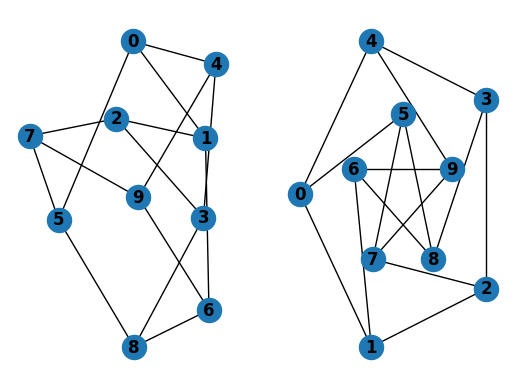

In [28]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

when drawing to an interactive display. Note that you may need to issue a Matplotlib

In [29]:
plt.show()

command if you are not using matplotlib in interactive mode.

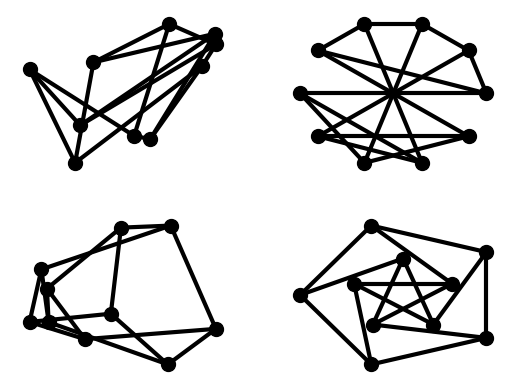

In [30]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

You can find additional options via draw_networkx() and layouts via the layout module. You can use multiple shells with draw_shell().



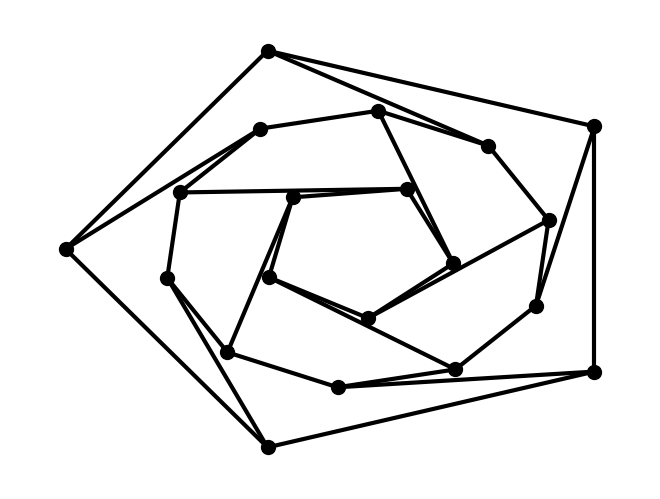

In [31]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

See [Drawing](https://networkx.org/documentation/stable/reference/drawing.html) for additional details.